Using Text Analytics to Analyze Wine Reviews
======

## Overview

Our dataset is a list of 129,971 reviews of different wines around the world by professional wine tasters at Wine Enthusiast, one of the preeminent wine magazines. The data was scraped from winemag.com during the week of June 15th, 2017.

Using NLTK package, we're going to perform different text analytic methods on the wine reviews, including sentiment analysis, tokenization, stopword removal, stemming, POS tagging, n-grams.

We then will assign rank based on sentiment score, identify countries with most popular wine and perform analysis and evaluation.

## Hypotheses

- Wine price is positively correlated with the higher rank given to review.
- Popular wine producing countries (such as France, Italy) are likely to produce higher ranked wines.
- Wines with the perfect score i.e., 100 also have the best sentiment score.
- Better ranked wines also have a positive correlation with longer description.

## Methodology

1. Data Collection/Preprocessing
2. Sentiment Analysis using NLTK Vader
3. Tokenization
4. Stopword Removal
5. Stemming + POS tagging + N-grams
6. Analysis and Evaluation

## Results

### To answer initial hypotheses

- Most of the top ranked wines are not considered expensive.
- Wines with high negative sentiment scores are also given low points.
- No significant correlation found between positive sentiment score/sentiment rank and wine points.
- Neural network model predicts wine variety well, with an accuracy of 71.62%
- Important predictors for wine variety are common sensory descriptors like blackberry, apple and cherry.

### Interesting Findings

- The **top 10** wine varieties are **White Blend, Riesling, Chardonnay, Merlot, Gamay, Zinfandel, Syrah, Nebbiolo and Barbera**.
- **France, Portugal, and the United States** frequently produce the top ranked wines. Our hypothesis related to France producing top wines has been satisfied, yet Italy does not rank high.
- Some of the most popular wines are Domaine Huët 2005 Pétillant (Vouvray), Château Haut-Simard 2009 Barrel sample (Saint), Straight Line 2011 Sauvignon Blanc.
- Provinces that produce highly-preceived and highly-ranked wines are Loire Valley, Bordeaux, California and Vinho Verde, to name a few.
- French wines are usually described as fresh, acidity, bright, rich, lively, sweet whereas American-produced wines as pleasant, rich, and aromatic.

|Country | France | Portugal | United States |
|--|------|-----|-----|
| **After stopword removal**<br>What are the common characteristics| French wines have characteristics like fresh, acidity, bright, rich, lively, sweet.|Portugal wines have characteristics like sweet, rich, lightly|US wines have characteristics like pleasant, rich, aromatic etc.|
| **Stemming** <br> helps in retaining root words |acid, sweet, rich, fine| light, rose. Rose is a preferred wine|soft, clean, aroma, pleasant, spice|
|**POS tagging**|Apple, plum, grapefruit, strawberry are noticable words|Rose and vanilla, texture of wine|Melon,blackberry, orange, grapefruit|
|n-gram (words that often appear together)|"fine" and "clean" <br> "apple" and "barrel"<br> "intense" and "sparkling"|"easy" and "fresh"<br> "slightly" and "sparkling"|"honey" and "orange"<br> "elegant" and "clean"<br>"rich" and "balanced"|

In [1]:
import pandas as pd

In [2]:
# read file
df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
desc=df['description']
desc[0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

# Sentiment Analysis using Vader

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 
import csv
sid = SentimentIntensityAnalyzer()
sent=[]
length=[]
for sentence in df['description']:
    l=len(sentence)
    length.append(l)
    ss = sid.polarity_scores(sentence)
    sent.append(ss)    
df1=pd.DataFrame(sent)
df3=pd.DataFrame(length)
merge4=pd.merge(df,df3, left_index=True, right_index=True)
merge1=pd.merge(merge4, df1, left_index=True, right_index=True)
merge2=merge1.sort_values(by='pos', ascending=False)
merge2['Rank'] = pd.factorize(merge2['pos'])[0] + 1
merge2.head()




C:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,0,compound,neg,neu,pos,Rank
117686,117686,France,"A fine, clean and intense sparkling wine, with...",Pétillant,88,30.0,Loire Valley,Vouvray,NaN,Roger Voss,@vossroger,Domaine Huët 2005 Pétillant (Vouvray),Chenin Blanc,Domaine Huët,98,0.9118,0.0,0.381,0.619,1
105733,105733,France,"88-90 Barrel sample. This is rich, with sweet ...",Barrel sample,89,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Simard 2009 Barrel sample (Saint...,Bordeaux-style Red Blend,Château Haut-Simard,126,0.9638,0.0,0.394,0.606,2
26305,26305,US,"The honey, orange, pineapple-jam and vanilla f...",NaN,87,22.0,California,Santa Barbara County,Central Coast,NaN,NaN,Straight Line 2011 Sauvignon Blanc (Santa Barb...,Sauvignon Blanc,Straight Line,157,0.9789,0.0,0.395,0.605,3
57169,57169,Portugal,"An easy, fresh, slightly sparkling wine with p...",NaN,83,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Caves Aliança 2006 White (Vinho Verde),Portuguese White,Caves Aliança,139,0.9596,0.0,0.409,0.591,4
111803,111803,France,"Classic southwest France Sauvignon Blanc, brig...",Reserve,86,8.0,Southwest France,Côtes de Gascogne,NaN,Roger Voss,@vossroger,Barton & Guestier 2010 Reserve Sauvignon Blanc...,Sauvignon Blanc,Barton & Guestier,124,0.9403,0.0,0.412,0.588,5


In [5]:
merge2.to_csv("winedataOutput.csv")

In [6]:
#top 10 wines
merge2.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,0,compound,neg,neu,pos,Rank
117686,117686,France,"A fine, clean and intense sparkling wine, with...",Pétillant,88,30.0,Loire Valley,Vouvray,NaN,Roger Voss,@vossroger,Domaine Huët 2005 Pétillant (Vouvray),Chenin Blanc,Domaine Huët,98,0.9118,0.000,0.381,0.619,1
105733,105733,France,"88-90 Barrel sample. This is rich, with sweet ...",Barrel sample,89,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Simard 2009 Barrel sample (Saint...,Bordeaux-style Red Blend,Château Haut-Simard,126,0.9638,0.000,0.394,0.606,2
26305,26305,US,"The honey, orange, pineapple-jam and vanilla f...",NaN,87,22.0,California,Santa Barbara County,Central Coast,NaN,NaN,Straight Line 2011 Sauvignon Blanc (Santa Barb...,Sauvignon Blanc,Straight Line,157,0.9789,0.000,0.395,0.605,3
57169,57169,Portugal,"An easy, fresh, slightly sparkling wine with p...",NaN,83,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Caves Aliança 2006 White (Vinho Verde),Portuguese White,Caves Aliança,139,0.9596,0.000,0.409,0.591,4
111803,111803,France,"Classic southwest France Sauvignon Blanc, brig...",Reserve,86,8.0,Southwest France,Côtes de Gascogne,NaN,Roger Voss,@vossroger,Barton & Guestier 2010 Reserve Sauvignon Blanc...,Sauvignon Blanc,Barton & Guestier,124,0.9403,0.000,0.412,0.588,5
67941,67941,France,"Fine fresh fruits, bright with good acidity an...",NaN,89,28.0,Burgundy,Pouilly-Fuissé,NaN,Roger Voss,@vossroger,Gilles Morat 2008 Pouilly-Fuissé,Chardonnay,Gilles Morat,152,0.9565,0.000,0.420,0.580,6
24704,24704,France,"Attractive perfumed wine, rich, soft, generous...",NaN,91,NaN,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Nenin 2008 Pomerol,Bordeaux-style Red Blend,Château Nenin,152,0.9716,0.000,0.426,0.574,7
89959,89959,France,Apple fruitiness dominates this fresh sparklin...,Brut Tradition,87,18.0,Alsace,Crémant d'Alsace,NaN,Roger Voss,@vossroger,Domaine Fernand Engel NV Brut Tradition Sparkl...,Sparkling Blend,Domaine Fernand Engel,163,0.9520,0.000,0.428,0.572,8
116097,116097,France,97-99 Barrel sample. A wonderfully structured ...,Barrel sample,98,NaN,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Mouton Rothschild 2009 Barrel sample ...,Bordeaux-style Red Blend,Château Mouton Rothschild,213,0.9809,0.000,0.430,0.570,9
35853,35853,France,"91-93 Smooth, rich strong wine, with delicious...",Barrel sample,92,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château du Glana 2010 Barrel sample (Saint-Ju...,Bordeaux-style Red Blend,Château du Glana,98,0.9393,0.000,0.430,0.570,9


# Tokenization

In [7]:
def tok(string):
    import nltk
    tokens = nltk.word_tokenize(string)
    words1 = [w.lower() for w in tokens]
    words2 = [w for w in words1 if w.isalpha()]   
    return words2
   

# Stopword removal

In [8]:
def stop(string):
    import nltk
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    words_nostopwords = [w for w in string if w not in stopwords]    
    return words_nostopwords

# Stemming

In [9]:
def stem(string):
    nltk.PorterStemmer?
    porter = nltk.PorterStemmer()
    stem1 = [porter.stem(w) for w in string]   
    return stem1

# POS tagging

In [10]:
#Generate a list of POS tags
def pos(string):
    POS_tags = nltk.pos_tag(string) #use unprocessed 'tokens', not 'words'
    #POS_tags
    POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]
    return POS_tag_listN

# n-grams

In [11]:
def ngram(string):
    from nltk.util import ngrams    
    bigrams=list(ngrams(string,2))
    return bigrams

# France Analysis
   

In [12]:
import nltk
from nltk import FreqDist
string=' '
france=merge2.loc[(merge2['country']=='France') & (merge2['Rank']<=50)]
for d in france['description']:
    string=string+d
france_token=tok(string)
#generate a frequency dictionary for all tokens 
freq = FreqDist(france_token)

#sort the frequency list in descending order
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)

[('and', 71),
 ('a', 54),
 ('with', 32),
 ('wine', 28),
 ('of', 22),
 ('the', 21),
 ('is', 20),
 ('acidity', 19),
 ('fresh', 19),
 ('it', 19),
 ('this', 17),
 ('great', 17),
 ('bright', 15),
 ('rich', 14),
 ('as', 13),
 ('delicious', 12),
 ('well', 12),
 ('fruit', 11),
 ('fruits', 10),
 ('lively', 10),
 ('that', 10),
 ('to', 10),
 ('sweet', 9),
 ('flavors', 9),
 ('clean', 8),
 ('has', 8),
 ('on', 8),
 ('fine', 7),
 ('apple', 7),
 ('tannins', 7),
 ('there', 6),
 ('texture', 6),
 ('ripe', 6),
 ('elegant', 6),
 ('ready', 6),
 ('dense', 6),
 ('barrel', 5),
 ('sample', 5),
 ('good', 5),
 ('for', 5),
 ('crisp', 5),
 ('in', 5),
 ('nose', 5),
 ('palate', 5),
 ('very', 5),
 ('drink', 5),
 ('sweetness', 5),
 ('mature', 5),
 ('but', 5),
 ('lemon', 4),
 ('character', 4),
 ('soft', 4),
 ('light', 4),
 ('structure', 4),
 ('apricot', 4),
 ('juice', 4),
 ('an', 4),
 ('richness', 4),
 ('shows', 4),
 ('spice', 4),
 ('full', 4),
 ('red', 4),
 ('are', 4),
 ('white', 4),
 ('fruity', 4),
 ('intense', 3),
 (

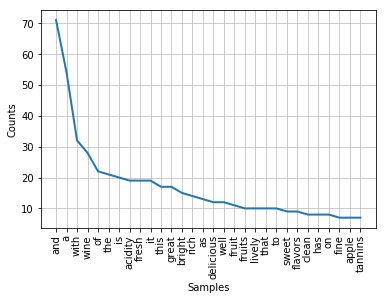

In [13]:
import matplotlib
%matplotlib inline
from matplotlib import pylab
freq.plot(30)

In [14]:
france_stop=stop(france_token)
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(france_stop)
#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_freq_nostw

[('wine', 28),
 ('acidity', 19),
 ('fresh', 19),
 ('great', 17),
 ('bright', 15),
 ('rich', 14),
 ('delicious', 12),
 ('well', 12),
 ('fruit', 11),
 ('fruits', 10),
 ('lively', 10),
 ('sweet', 9),
 ('flavors', 9),
 ('clean', 8),
 ('fine', 7),
 ('apple', 7),
 ('tannins', 7),
 ('texture', 6),
 ('ripe', 6),
 ('elegant', 6),
 ('ready', 6),
 ('dense', 6),
 ('barrel', 5),
 ('sample', 5),
 ('good', 5),
 ('crisp', 5),
 ('nose', 5),
 ('palate', 5),
 ('drink', 5),
 ('sweetness', 5),
 ('mature', 5),
 ('lemon', 4),
 ('character', 4),
 ('soft', 4),
 ('light', 4),
 ('structure', 4),
 ('apricot', 4),
 ('juice', 4),
 ('richness', 4),
 ('shows', 4),
 ('spice', 4),
 ('full', 4),
 ('red', 4),
 ('white', 4),
 ('fruity', 4),
 ('intense', 3),
 ('plum', 3),
 ('lovely', 3),
 ('strong', 3),
 ('grapefruit', 3),
 ('finishing', 3),
 ('powerful', 3),
 ('black', 3),
 ('mousse', 3),
 ('apéritif', 3),
 ('wonderfully', 3),
 ('dry', 3),
 ('hints', 3),
 ('freshness', 3),
 ('ideal', 3),
 ('bodied', 3),
 ('beautiful', 3),

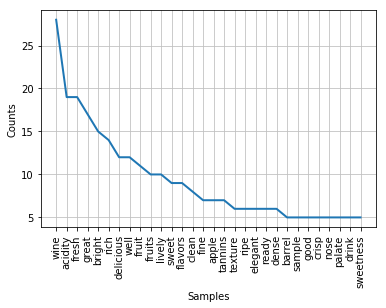

In [15]:
freq_nostw.plot(30)

In [16]:
france_stem=stem(france_stop)
#Get the frequency distribution 
freq1 = FreqDist(france_stem)
#Sort the result
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)
sorted_freq1

[('wine', 28),
 ('fruit', 22),
 ('fresh', 22),
 ('acid', 19),
 ('rich', 18),
 ('great', 17),
 ('bright', 16),
 ('sweet', 14),
 ('delici', 14),
 ('well', 12),
 ('live', 10),
 ('flavor', 9),
 ('fine', 8),
 ('clean', 8),
 ('appl', 7),
 ('tannin', 7),
 ('textur', 7),
 ('eleg', 7),
 ('drink', 6),
 ('finish', 6),
 ('ripe', 6),
 ('crisp', 6),
 ('structur', 6),
 ('readi', 6),
 ('matur', 6),
 ('show', 6),
 ('dens', 6),
 ('barrel', 5),
 ('sampl', 5),
 ('good', 5),
 ('power', 5),
 ('fruiti', 5),
 ('dri', 5),
 ('nose', 5),
 ('palat', 5),
 ('spice', 5),
 ('balanc', 5),
 ('lemon', 4),
 ('plum', 4),
 ('charact', 4),
 ('soft', 4),
 ('give', 4),
 ('light', 4),
 ('impress', 4),
 ('apricot', 4),
 ('juic', 4),
 ('hint', 4),
 ('attract', 4),
 ('full', 4),
 ('beauti', 4),
 ('red', 4),
 ('white', 4),
 ('intens', 3),
 ('sparkl', 3),
 ('love', 3),
 ('strong', 3),
 ('grapefruit', 3),
 ('black', 3),
 ('mouss', 3),
 ('final', 3),
 ('apéritif', 3),
 ('wonder', 3),
 ('ideal', 3),
 ('raspberri', 3),
 ('bodi', 3),
 (

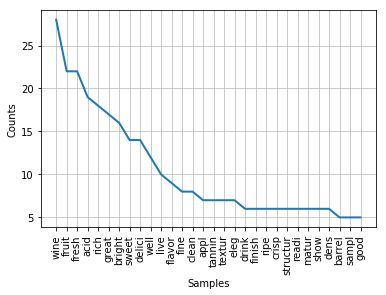

In [17]:
freq1.plot(30)

In [18]:
france_pos=pos(france_token)
#Generate a frequency distribution 
tag_freq = nltk.FreqDist(france_pos)
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq

[(('wine', 'NN'), 28),
 (('acidity', 'NN'), 18),
 (('fruit', 'NN'), 11),
 (('fruits', 'NNS'), 10),
 (('flavors', 'NNS'), 9),
 (('apple', 'NN'), 7),
 (('tannins', 'NNS'), 7),
 (('texture', 'NN'), 6),
 (('sample', 'NN'), 5),
 (('palate', 'NN'), 5),
 (('sweetness', 'NN'), 5),
 (('barrel', 'NN'), 4),
 (('character', 'NN'), 4),
 (('structure', 'NN'), 4),
 (('juice', 'NN'), 4),
 (('spice', 'NN'), 4),
 (('plum', 'NN'), 3),
 (('grapefruit', 'NN'), 3),
 (('mousse', 'NN'), 3),
 (('hints', 'NNS'), 3),
 (('richness', 'NN'), 3),
 (('freshness', 'NN'), 3),
 (('dense', 'NN'), 3),
 (('fruity', 'NN'), 3),
 (('clean', 'NN'), 2),
 (('lemon', 'NN'), 2),
 (('juicy', 'NN'), 2),
 (('summer', 'NN'), 2),
 (('plays', 'NNS'), 2),
 (('elegant', 'NN'), 2),
 (('raspberry', 'NN'), 2),
 (('sweet', 'NN'), 2),
 (('bottle', 'NN'), 2),
 (('currant', 'NN'), 2),
 (('finish', 'NN'), 2),
 (('ideal', 'NN'), 2),
 (('strawberry', 'NN'), 2),
 (('power', 'NN'), 2),
 (('touch', 'NN'), 2),
 (('leads', 'NNS'), 2),
 (('hay', 'NN'), 2

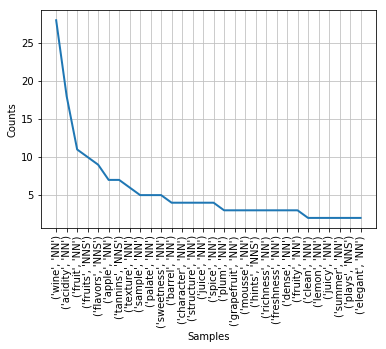

In [19]:
tag_freq.plot(30)

In [20]:
france_bigram=ngram(france_token)
print(len(france_bigram))
france_bigram

990


[('a', 'fine'),
 ('fine', 'clean'),
 ('clean', 'and'),
 ('and', 'intense'),
 ('intense', 'sparkling'),
 ('sparkling', 'wine'),
 ('wine', 'with'),
 ('with', 'excellent'),
 ('excellent', 'acidity'),
 ('acidity', 'and'),
 ('and', 'bright'),
 ('bright', 'lemon'),
 ('lemon', 'and'),
 ('and', 'apple'),
 ('apple', 'barrel'),
 ('barrel', 'sample'),
 ('sample', 'this'),
 ('this', 'is'),
 ('is', 'rich'),
 ('rich', 'with'),
 ('with', 'sweet'),
 ('sweet', 'fruits'),
 ('fruits', 'and'),
 ('and', 'delicious'),
 ('delicious', 'sweet'),
 ('sweet', 'plum'),
 ('plum', 'flavors'),
 ('flavors', 'good'),
 ('good', 'tannins'),
 ('tannins', 'a'),
 ('a', 'lovely'),
 ('lovely', 'juicy'),
 ('juicy', 'southwest'),
 ('southwest', 'france'),
 ('france', 'sauvignon'),
 ('sauvignon', 'blanc'),
 ('blanc', 'bright'),
 ('bright', 'fresh'),
 ('fresh', 'and'),
 ('and', 'great'),
 ('great', 'for'),
 ('for', 'summer'),
 ('summer', 'drinking'),
 ('drinking', 'clean'),
 ('clean', 'and'),
 ('and', 'fresh'),
 ('fresh', 'fruits

# Portugal Analysis

In [21]:
import nltk
from nltk import FreqDist
string=' '
port=merge2.loc[(merge2['country']=='Portugal') & (merge2['Rank']<=50)]
for d in port['description']:
    string=string+d
port_token=tok(string)
#generate a frequency dictionary for all tokens 
freq = FreqDist(port_token)

#sort the frequency list in descending order
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)
sorted_freq

[('a', 10),
 ('with', 8),
 ('and', 7),
 ('is', 6),
 ('fresh', 5),
 ('wine', 5),
 ('it', 5),
 ('sweet', 4),
 ('fruit', 4),
 ('great', 4),
 ('the', 4),
 ('to', 4),
 ('clean', 3),
 ('as', 3),
 ('well', 3),
 ('rich', 3),
 ('just', 3),
 ('bright', 3),
 ('of', 3),
 ('good', 3),
 ('drink', 3),
 ('an', 2),
 ('lightly', 2),
 ('apéritif', 2),
 ('some', 2),
 ('fruity', 2),
 ('rosé', 2),
 ('attractive', 2),
 ('red', 2),
 ('this', 2),
 ('delicious', 2),
 ('fine', 2),
 ('has', 2),
 ('acidity', 2),
 ('texture', 2),
 ('ready', 2),
 ('lift', 2),
 ('that', 2),
 ('ripe', 2),
 ('easy', 1),
 ('slightly', 1),
 ('sparkling', 1),
 ('pleasant', 1),
 ('soft', 1),
 ('flavors', 1),
 ('for', 1),
 ('summer', 1),
 ('there', 1),
 ('elegance', 1),
 ('here', 1),
 ('perfumed', 1),
 ('juiciness', 1),
 ('attractively', 1),
 ('uncomplex', 1),
 ('currants', 1),
 ('vanilla', 1),
 ('flavor', 1),
 ('food', 1),
 ('port', 1),
 ('integrated', 1),
 ('spirit', 1),
 ('touch', 1),
 ('give', 1),
 ('very', 1),
 ('apple', 1),
 ('skin', 

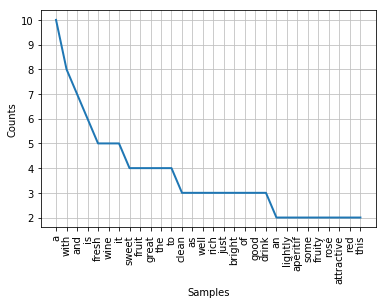

In [22]:
import matplotlib
from matplotlib import pylab
freq.plot(30)

In [23]:
port_stop=stop(port_token)
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(port_stop)
#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_freq_nostw

[('fresh', 5),
 ('wine', 5),
 ('sweet', 4),
 ('fruit', 4),
 ('great', 4),
 ('clean', 3),
 ('well', 3),
 ('rich', 3),
 ('bright', 3),
 ('good', 3),
 ('drink', 3),
 ('lightly', 2),
 ('apéritif', 2),
 ('fruity', 2),
 ('rosé', 2),
 ('attractive', 2),
 ('red', 2),
 ('delicious', 2),
 ('fine', 2),
 ('acidity', 2),
 ('texture', 2),
 ('ready', 2),
 ('lift', 2),
 ('ripe', 2),
 ('easy', 1),
 ('slightly', 1),
 ('sparkling', 1),
 ('pleasant', 1),
 ('soft', 1),
 ('flavors', 1),
 ('summer', 1),
 ('elegance', 1),
 ('perfumed', 1),
 ('juiciness', 1),
 ('attractively', 1),
 ('uncomplex', 1),
 ('currants', 1),
 ('vanilla', 1),
 ('flavor', 1),
 ('food', 1),
 ('port', 1),
 ('integrated', 1),
 ('spirit', 1),
 ('touch', 1),
 ('give', 1),
 ('apple', 1),
 ('skin', 1),
 ('aciidty', 1),
 ('crisp', 1),
 ('white', 1),
 ('fruits', 1),
 ('dances', 1),
 ('easily', 1),
 ('light', 1),
 ('deliciously', 1),
 ('lemony', 1),
 ('aromatic', 1),
 ('yet', 1),
 ('also', 1),
 ('elegant', 1),
 ('mature', 1),
 ('selection', 1),
 

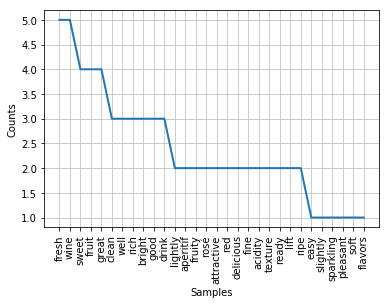

In [24]:
freq_nostw.plot(30)

In [25]:
port_stem=stem(port_stop)
#Get the frequency distribution 
freq1 = FreqDist(port_stem)
#Sort the result
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)
sorted_freq1

[('fresh', 5),
 ('wine', 5),
 ('sweet', 5),
 ('fruit', 5),
 ('great', 4),
 ('rich', 4),
 ('clean', 3),
 ('well', 3),
 ('attract', 3),
 ('bright', 3),
 ('delici', 3),
 ('fine', 3),
 ('good', 3),
 ('drink', 3),
 ('sparkl', 2),
 ('lightli', 2),
 ('flavor', 2),
 ('apéritif', 2),
 ('eleg', 2),
 ('fruiti', 2),
 ('rosé', 2),
 ('red', 2),
 ('touch', 2),
 ('acid', 2),
 ('give', 2),
 ('appl', 2),
 ('textur', 2),
 ('readi', 2),
 ('lift', 2),
 ('ripe', 2),
 ('balanc', 2),
 ('easi', 1),
 ('slightli', 1),
 ('pleasant', 1),
 ('soft', 1),
 ('summer', 1),
 ('perfum', 1),
 ('juici', 1),
 ('uncomplex', 1),
 ('currant', 1),
 ('vanilla', 1),
 ('food', 1),
 ('port', 1),
 ('integr', 1),
 ('spirit', 1),
 ('skin', 1),
 ('aciidti', 1),
 ('crisp', 1),
 ('white', 1),
 ('danc', 1),
 ('easili', 1),
 ('light', 1),
 ('lemoni', 1),
 ('aromat', 1),
 ('yet', 1),
 ('also', 1),
 ('matur', 1),
 ('select', 1),
 ('best', 1),
 ('lot', 1),
 ('spice', 1),
 ('plum', 1),
 ('gener', 1),
 ('bring', 1),
 ('toasti', 1),
 ('alongsid',

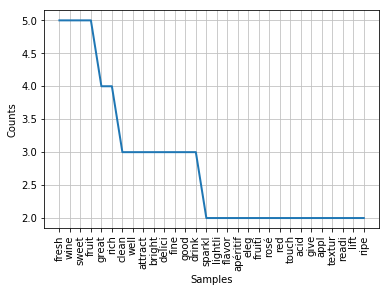

In [26]:
freq1.plot(30)

In [27]:
port_pos=pos(port_token)
#Generate a frequency distribution 
tag_freq = nltk.FreqDist(port_pos)
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq

[(('wine', 'NN'), 5),
 (('fruit', 'NN'), 4),
 (('rosé', 'NN'), 2),
 (('acidity', 'NN'), 2),
 (('texture', 'NN'), 2),
 (('lift', 'NN'), 2),
 (('flavors', 'NNS'), 1),
 (('apéritif', 'NN'), 1),
 (('summer', 'NN'), 1),
 (('elegance', 'NN'), 1),
 (('sweet', 'NN'), 1),
 (('juiciness', 'NN'), 1),
 (('currants', 'NNS'), 1),
 (('vanilla', 'NN'), 1),
 (('flavor', 'NN'), 1),
 (('delicious', 'NN'), 1),
 (('food', 'NN'), 1),
 (('port', 'NN'), 1),
 (('spirit', 'NN'), 1),
 (('touch', 'NN'), 1),
 (('apple', 'NN'), 1),
 (('skin', 'NN'), 1),
 (('aciidty', 'NN'), 1),
 (('fruits', 'NNS'), 1),
 (('fruity', 'NN'), 1),
 (('selection', 'NN'), 1),
 (('lots', 'NNS'), 1),
 (('plum', 'NN'), 1),
 (('fine', 'NN'), 1),
 (('toastiness', 'NN'), 1),
 (('balance', 'NN'), 1),
 (('richness', 'NN'), 1),
 (('aftertaste', 'NN'), 1),
 (('apples', 'NNS'), 1),
 (('sweetness', 'NN'), 1),
 (('style', 'NN'), 1),
 (('vinho', 'NN'), 1),
 (('verde', 'NN'), 1),
 (('screwcap', 'NN'), 1)]

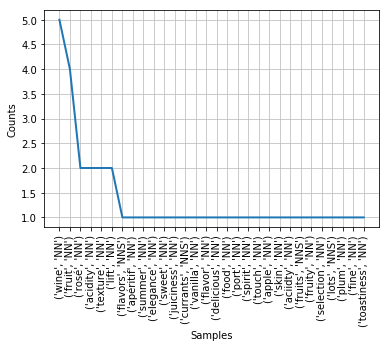

In [28]:
tag_freq.plot(30)

In [29]:
port_bigram=ngram(port_token)
print(len(port_bigram))
port_bigram

199


[('an', 'easy'),
 ('easy', 'fresh'),
 ('fresh', 'slightly'),
 ('slightly', 'sparkling'),
 ('sparkling', 'wine'),
 ('wine', 'with'),
 ('with', 'pleasant'),
 ('pleasant', 'soft'),
 ('soft', 'lightly'),
 ('lightly', 'sweet'),
 ('sweet', 'fruit'),
 ('fruit', 'flavors'),
 ('flavors', 'it'),
 ('it', 'is'),
 ('is', 'clean'),
 ('clean', 'a'),
 ('a', 'great'),
 ('great', 'apéritif'),
 ('apéritif', 'for'),
 ('for', 'a'),
 ('a', 'summer'),
 ('summer', 'there'),
 ('there', 'is'),
 ('is', 'some'),
 ('some', 'elegance'),
 ('elegance', 'here'),
 ('here', 'as'),
 ('as', 'well'),
 ('well', 'as'),
 ('as', 'rich'),
 ('rich', 'fruit'),
 ('fruit', 'and'),
 ('and', 'sweet'),
 ('sweet', 'perfumed'),
 ('perfumed', 'juiciness'),
 ('juiciness', 'it'),
 ('it', 'attractively'),
 ('attractively', 'fruity'),
 ('fruity', 'uncomplex'),
 ('uncomplex', 'just'),
 ('just', 'rosé'),
 ('rosé', 'with'),
 ('with', 'great'),
 ('great', 'fresh'),
 ('fresh', 'fruit'),
 ('fruit', 'attractive'),
 ('attractive', 'red'),
 ('red', '

# US analysis

In [30]:
import nltk
from nltk import FreqDist
string=' '
us=merge2.loc[(merge2['country']=='US') & (merge2['Rank']<=50)]
for d in us['description']:
    string=string+d
us_token=tok(string)
#generate a frequency dictionary for all tokens 
freq = FreqDist(us_token)

#sort the frequency list in descending order
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)
sorted_freq

[('and', 44),
 ('a', 21),
 ('flavors', 14),
 ('clean', 9),
 ('fresh', 9),
 ('of', 9),
 ('like', 8),
 ('with', 8),
 ('the', 7),
 ('but', 7),
 ('it', 7),
 ('this', 7),
 ('wine', 7),
 ('to', 6),
 ('sweet', 6),
 ('pleasant', 6),
 ('rich', 5),
 ('apple', 5),
 ('aromas', 5),
 ('is', 5),
 ('on', 5),
 ('texture', 4),
 ('soft', 4),
 ('melon', 4),
 ('bright', 4),
 ('acidity', 3),
 ('elegant', 3),
 ('sweetness', 3),
 ('easy', 3),
 ('delicious', 3),
 ('drink', 3),
 ('blackberry', 3),
 ('into', 3),
 ('great', 3),
 ('in', 3),
 ('an', 3),
 ('citrus', 3),
 ('that', 3),
 ('pretty', 3),
 ('best', 3),
 ('offers', 3),
 ('cherry', 3),
 ('honey', 2),
 ('orange', 2),
 ('vanilla', 2),
 ('are', 2),
 ('by', 2),
 ('grapefruit', 2),
 ('for', 2),
 ('at', 2),
 ('such', 2),
 ('good', 2),
 ('syrup', 2),
 ('broad', 2),
 ('fruit', 2),
 ('beautiful', 2),
 ('notes', 2),
 ('simple', 2),
 ('spice', 2),
 ('vibrant', 2),
 ('peach', 2),
 ('almost', 2),
 ('mellow', 2),
 ('pear', 2),
 ('light', 2),
 ('persistent', 2),
 ('appeal

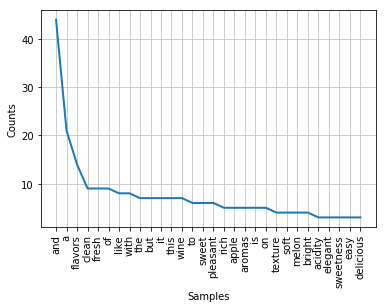

In [31]:
import matplotlib
from matplotlib import pylab
freq.plot(30)

In [32]:
us_stop=stop(us_token)
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(us_stop)
#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_freq_nostw

[('flavors', 14),
 ('clean', 9),
 ('fresh', 9),
 ('like', 8),
 ('wine', 7),
 ('sweet', 6),
 ('pleasant', 6),
 ('rich', 5),
 ('apple', 5),
 ('aromas', 5),
 ('texture', 4),
 ('soft', 4),
 ('melon', 4),
 ('bright', 4),
 ('acidity', 3),
 ('elegant', 3),
 ('sweetness', 3),
 ('easy', 3),
 ('delicious', 3),
 ('drink', 3),
 ('blackberry', 3),
 ('great', 3),
 ('citrus', 3),
 ('pretty', 3),
 ('best', 3),
 ('offers', 3),
 ('cherry', 3),
 ('honey', 2),
 ('orange', 2),
 ('vanilla', 2),
 ('grapefruit', 2),
 ('good', 2),
 ('syrup', 2),
 ('broad', 2),
 ('fruit', 2),
 ('beautiful', 2),
 ('notes', 2),
 ('simple', 2),
 ('spice', 2),
 ('vibrant', 2),
 ('peach', 2),
 ('almost', 2),
 ('mellow', 2),
 ('pear', 2),
 ('light', 2),
 ('persistent', 2),
 ('appealing', 2),
 ('selection', 2),
 ('enjoyed', 2),
 ('extremely', 1),
 ('balanced', 1),
 ('brightened', 1),
 ('brilliant', 1),
 ('floral', 1),
 ('lead', 1),
 ('definite', 1),
 ('satisfying', 1),
 ('every', 1),
 ('level', 1),
 ('kudos', 1),
 ('winery', 1),
 ('re

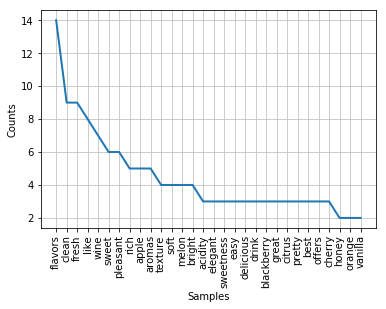

In [33]:
freq_nostw.plot(30)

In [34]:
us_stem=stem(us_stop)
#Get the frequency distribution 
freq1 = FreqDist(us_stem)
#Sort the result
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)
sorted_freq1

[('flavor', 15),
 ('clean', 9),
 ('sweet', 9),
 ('fresh', 9),
 ('like', 8),
 ('wine', 7),
 ('aroma', 6),
 ('pleasant', 6),
 ('rich', 5),
 ('appl', 5),
 ('textur', 4),
 ('soft', 4),
 ('melon', 4),
 ('bright', 4),
 ('acid', 3),
 ('eleg', 3),
 ('easi', 3),
 ('delici', 3),
 ('drink', 3),
 ('blackberri', 3),
 ('great', 3),
 ('fruit', 3),
 ('citru', 3),
 ('pretti', 3),
 ('best', 3),
 ('spice', 3),
 ('offer', 3),
 ('cherri', 3),
 ('honey', 2),
 ('orang', 2),
 ('vanilla', 2),
 ('balanc', 2),
 ('lead', 2),
 ('grapefruit', 2),
 ('satisfi', 2),
 ('good', 2),
 ('syrup', 2),
 ('broad', 2),
 ('sugar', 2),
 ('beauti', 2),
 ('nice', 2),
 ('wonder', 2),
 ('note', 2),
 ('simpl', 2),
 ('vibrant', 2),
 ('peach', 2),
 ('almost', 2),
 ('mellow', 2),
 ('pear', 2),
 ('light', 2),
 ('persist', 2),
 ('appeal', 2),
 ('select', 2),
 ('enjoy', 2),
 ('extrem', 1),
 ('brighten', 1),
 ('brilliant', 1),
 ('floral', 1),
 ('definit', 1),
 ('everi', 1),
 ('level', 1),
 ('kudo', 1),
 ('wineri', 1),
 ('releas', 1),
 ('dri'

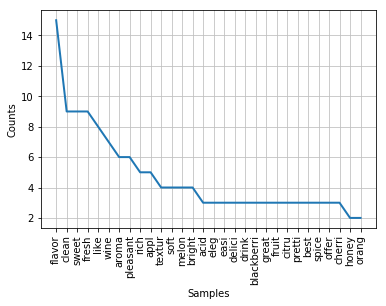

In [35]:
freq1.plot(30)

In [36]:
us_pos=pos(us_token)
#Generate a frequency distribution 
tag_freq = nltk.FreqDist(us_pos)
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq

[(('flavors', 'NNS'), 14),
 (('wine', 'NN'), 7),
 (('apple', 'NN'), 5),
 (('texture', 'NN'), 4),
 (('melon', 'NN'), 4),
 (('acidity', 'NN'), 3),
 (('aromas', 'NNS'), 3),
 (('sweetness', 'NN'), 3),
 (('blackberry', 'NN'), 3),
 (('sweet', 'NN'), 3),
 (('honey', 'NN'), 2),
 (('orange', 'NN'), 2),
 (('vanilla', 'NN'), 2),
 (('grapefruit', 'NN'), 2),
 (('aromas', 'NN'), 2),
 (('fruit', 'NN'), 2),
 (('citrus', 'NN'), 2),
 (('notes', 'NNS'), 2),
 (('spice', 'NN'), 2),
 (('peach', 'NN'), 2),
 (('cherry', 'NN'), 2),
 (('light', 'NN'), 2),
 (('selection', 'NN'), 2),
 (('level', 'NN'), 1),
 (('kudos', 'NN'), 1),
 (('winery', 'NN'), 1),
 (('complex', 'NN'), 1),
 (('price', 'NN'), 1),
 (('easy', 'NNS'), 1),
 (('boysenberry', 'NN'), 1),
 (('maple', 'NN'), 1),
 (('jam', 'NN'), 1),
 (('blockbuster', 'NN'), 1),
 (('touch', 'NN'), 1),
 (('something', 'NN'), 1),
 (('spicy', 'NN'), 1),
 (('pork', 'NN'), 1),
 (('candy', 'NN'), 1),
 (('bar', 'NN'), 1),
 (('chard', 'NN'), 1),
 (('lovers', 'NNS'), 1),
 (('ton

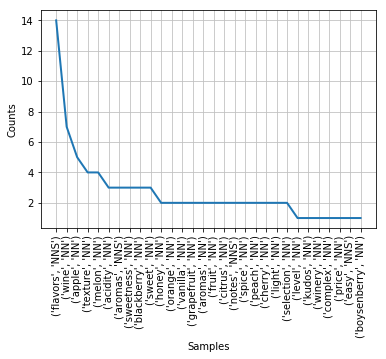

In [37]:
tag_freq.plot(30)

In [38]:
us_bigram=ngram(us_token)
print(len(us_bigram))
us_bigram

457


[('the', 'honey'),
 ('honey', 'orange'),
 ('orange', 'and'),
 ('and', 'vanilla'),
 ('vanilla', 'flavors'),
 ('flavors', 'are'),
 ('are', 'extremely'),
 ('extremely', 'rich'),
 ('rich', 'but'),
 ('but', 'balanced'),
 ('balanced', 'and'),
 ('and', 'brightened'),
 ('brightened', 'by'),
 ('by', 'brilliant'),
 ('brilliant', 'acidity'),
 ('acidity', 'it'),
 ('it', 'elegant'),
 ('elegant', 'clean'),
 ('clean', 'and'),
 ('and', 'apple'),
 ('apple', 'and'),
 ('and', 'floral'),
 ('floral', 'aromas'),
 ('aromas', 'lead'),
 ('lead', 'to'),
 ('to', 'rich'),
 ('rich', 'flavors'),
 ('flavors', 'like'),
 ('like', 'apple'),
 ('apple', 'honey'),
 ('honey', 'and'),
 ('and', 'grapefruit'),
 ('grapefruit', 'and'),
 ('and', 'a'),
 ('a', 'definite'),
 ('definite', 'sweetness'),
 ('sweetness', 'this'),
 ('this', 'wine'),
 ('wine', 'is'),
 ('is', 'fresh'),
 ('fresh', 'and'),
 ('and', 'easy'),
 ('easy', 'to'),
 ('to', 'satisfying'),
 ('satisfying', 'on'),
 ('on', 'every'),
 ('every', 'level'),
 ('level', 'kudos